In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd

/anaconda3/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
x = [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]
y = [0,    0,    0,    0,    0,    0,    1,    0,    1,    0,    1,    0,    1,    0,    1,    1,    1,    1,    1,    1]

X_test = [0, 1, 2, 3, 4, 5]

In [14]:
X = sm.add_constant(x)

logit = sm.Logit(y,X).fit_regularized()
proba = (logit.predict(X))

# estimate confidence interval for predicted probabilities
cov = logit.cov_params()
gradient = (proba * (1 - proba) * X.T).T # matrix of gradients for each observation
std_errors = np.array([np.sqrt(np.dot(np.dot(g, cov), g)) for g in gradient])

c = 1.96 # multiplier for confidence interval
upper = np.maximum(0, np.minimum(1, proba + std_errors * c))
lower = np.maximum(0, np.minimum(1, proba - std_errors * c))

plt.plot(x, proba, label ='Probability')
plt.plot(x, lower, color='g',label='lower 95% CI')
plt.plot(x, upper, color='g', label = 'upper 95% CI')
plt.legend()
plt.show()

ValueError: exog is not 1d or 2d

In [17]:
rnd_hrs = np.random.uniform(0,5,100)
rnd_X = sm.add_constant(rnd_hrs)
rnd_proba = (logit.predict(rnd_X))
# print(rnd_proba)
i = 0
for item in rnd_proba:
    if item<0.5:
        rnd_proba[i] = 0
    else:
        item = rnd_proba[i] = 1
    i += 1

In [21]:
#bootstrap
preds = []
for i in range(1):
    boot_idx = np.random.choice(len(rnd_X), replace=True, size=len(rnd_X))
    print(boot_idx,type(boot_idx))
    Y=[]
    for i in boot_idx:
        Y.append(rnd_proba[i])
    print(Y)
    try:
        model = sm.Logit(Y, rnd_X[boot_idx]).fit_regularized()
        sorted = np.sort(rnd_X[boot_idx],axis=0)
        print("SORTED",sorted)
        preds.append(logit.predict(sorted))
        print("SORTED PREDS", logit.predict(sorted))
    except:
        pass


print(preds)

[83 59 68 42 88 79 46 56 60 35 24 44 91 23 24 85  7  3 22 93 66  4 73 93
 91  6 98 89 43 36 51 79 91 51 91 86 78 93 90 28 90 15 95  3 12  5 35 22
 97 84 24 56 70 65  0  3  5 88 12 24 10 93 23  1 81 72 33 76 23 71 50 23
 72 35 27 34 39 73 91 82  1 36 93 62 75 34 91 29 66 17 48 29 55 75 41 55
 70 57 58  2] <class 'numpy.ndarray'>
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.239287134501905e-11
            Iterations: 51
            Function evaluati

/anaconda3/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


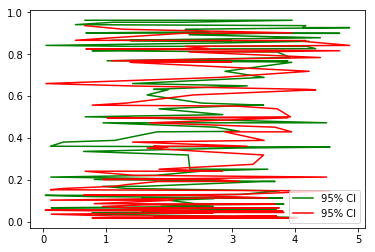

In [20]:
p = np.array(preds)
plt.plot(rnd_X[:, 1], np.percentile(p, 95.5, axis=0),color='g',label='95% CI')
plt.plot(rnd_X[:, 1], np.percentile(p, 2.5, axis=0),color='r',label='95% CI')
plt.legend()
plt.show()